# Graphical Representations of Data
By Evgenia "Jenny" Nitishinskaya, Maxwell Margenot, and Delaney Granizo-Mackenzie.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



Representing data graphically can be incredibly useful for learning how the data behaves and seeing potential structure or flaws. Care should be taken, as humans are incredibly good at seeing only evidence that confirms our beliefs, and visual data lends itself well to that. Plots are good to use when formulating a hypothesis, but should not be used to test a hypothesis.

We will go over some common plots here.

In [1]:
# Import our libraries

# This is for numerical processing
import numpy as np
# This is the library most commonly used for plotting in Python.
# Notice how we import it 'as' plt, this enables us to type plt
# rather than the full string every time.
import matplotlib.pyplot as plt

## Getting Some Data

If we're going to plot data we need some data to plot. We'll get the pricing data of Apple (AAPL) and Microsoft (MSFT) to use in our examples.

### Data Structure

Knowing the structure of your data is very important. Normally you'll have to do a ton of work molding your data into the form you need for testing. Quantopian has done a lot of cleaning on the data, but you still need to put it into the right shapes and formats for your purposes.

In this case the data will be returned as a pandas dataframe object. The rows are timestamps, and the columns are the two assets, AAPL and MSFT.

In [2]:
import pandas_datareader as pdr

start = '2014-01-01'
end = '2015-01-01'
data = pdr.get_data_yahoo(['AAPL', 'MSFT'], start=start, end=end)
data.head()

Attributes  Adj Close                 Close  ...       Open       Volume            
Symbols          AAPL       MSFT       AAPL  ...       MSFT         AAPL        MSFT
Date                                         ...                                    
2014-01-02  17.598297  32.057323  19.754642  ...  37.349998  234684800.0  30632200.0
2014-01-03  17.211735  31.841665  19.320715  ...  37.200001  392467600.0  31134800.0
2014-01-06  17.305593  31.168766  19.426071  ...  36.849998  412610800.0  43603700.0
2014-01-07  17.181829  31.410315  19.287144  ...  36.330002  317209200.0  35802800.0
2014-01-08  17.290642  30.849575  19.409286  ...  36.000000  258529600.0  59971700.0

[5 rows x 12 columns]

In [3]:
inicio='2018-01-01'
fin='2019-01-01'
datos=pdr.get_data_yahoo(['BIIB','NVDA'], start=inicio, end=fin)
datos.head()

Attributes   Adj Close              ...     Volume            
Symbols           BIIB        NVDA  ...       BIIB        NVDA
Date                                ...                       
2018-01-02  334.170013  197.695740  ...  1422500.0   8890400.0
2018-01-03  339.850006  210.706848  ...  1121700.0  22867600.0
2018-01-04  339.989990  211.817535  ...   967100.0  14581700.0
2018-01-05  342.489990  213.612518  ...  1486400.0  14503100.0
2018-01-08  329.649994  220.157761  ...  1438800.0  22030400.0

[5 rows x 12 columns]

Indexing into the data with `data['AAPL']` will yield an error because the type of the columns are equity objects and not simple strings. Let's change that using this little piece of Python code. Don't worry about understanding it right now, unless you do, in which case congratulations.

In [4]:
data.columns = [e for e in data.columns]
data.head()

,"(Adj Close, AAPL)","(Adj Close, MSFT)","(Close, AAPL)","(Close, MSFT)","(High, AAPL)","(High, MSFT)","(Low, AAPL)","(Low, MSFT)","(Open, AAPL)","(Open, MSFT)","(Volume, AAPL)","(Volume, MSFT)"
Date,,,,,,,,,,,,
2014-01-02,17.598297,32.057323,19.754642,37.160000,19.893929,37.400002,19.715000,37.099998,19.845715,37.349998,234684800.0,30632200.0
2014-01-03,17.211735,31.841665,19.320715,36.910000,19.775000,37.220001,19.301071,36.599998,19.745001,37.200001,392467600.0,31134800.0
2014-01-06,17.305593,31.168766,19.426071,36.130001,19.528570,36.889999,19.057142,36.110001,19.194643,36.849998,412610800.0,43603700.0
2014-01-07,17.181829,31.410315,19.287144,36.410000,19.498571,36.490002,19.211430,36.209999,19.440001,36.330002,317209200.0,35802800.0
2014-01-08,17.290642,30.849575,19.409286,35.759998,19.484285,36.139999,19.238930,35.580002,19.243214,36.000000,258529600.0,59971700.0


In [5]:
datos.columns=[e for e in datos.columns]
datos.head()

,"(Adj Close, BIIB)","(Adj Close, NVDA)","(Close, BIIB)","(Close, NVDA)","(High, BIIB)","(High, NVDA)","(Low, BIIB)","(Low, NVDA)","(Open, BIIB)","(Open, NVDA)","(Volume, BIIB)","(Volume, NVDA)"
Date,,,,,,,,,,,,
2018-01-02,334.170013,197.695740,334.170013,199.350006,335.429993,199.500000,318.329987,194.500000,321.149994,195.779999,1422500.0,8890400.0
2018-01-03,339.850006,210.706848,339.850006,212.470001,340.450012,213.699997,332.709991,203.750000,333.459991,204.100006,1121700.0,22867600.0
2018-01-04,339.989990,211.817535,339.989990,213.589996,341.399994,218.050003,335.459991,212.690002,339.730011,215.759995,967100.0,14581700.0
2018-01-05,342.489990,213.612518,342.489990,215.399994,344.119995,216.910004,339.059998,211.080002,342.000000,214.190002,1486400.0,14503100.0
2018-01-08,329.649994,220.157761,329.649994,222.000000,341.940002,225.000000,327.260010,218.580002,341.450012,220.399994,1438800.0,22030400.0


Much nicer, now we can index. Indexing into the 2D dataframe will give us a 1D series object. The index for the series is timestamps, the value upon index is a price. Similar to an array except instead of integer indecies it's times.

In [6]:
data['Close', 'AAPL'].head()

Date
2014-01-02    19.754642
2014-01-03    19.320715
2014-01-06    19.426071
2014-01-07    19.287144
2014-01-08    19.409286
Name: (Close, AAPL), dtype: float64

In [7]:
datos['Open', 'BIIB'].head()

Date
2018-01-02    321.149994
2018-01-03    333.459991
2018-01-04    339.730011
2018-01-05    342.000000
2018-01-08    341.450012
Name: (Open, BIIB), dtype: float64

##Histogram

A histogram is a visualization of how frequent different values of data are. By displaying a frequency distribution using bars, it lets us quickly see where most of the observations are clustered. The height of each bar represents the number of observations that lie in each interval. You can think of a histogram as an empirical and discrete Probability Density Function (PDF).

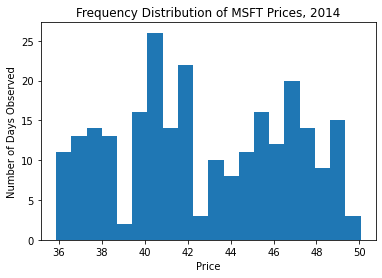

In [8]:
# Plot a histogram using 20 bins
plt.hist(data['High', 'MSFT'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Prices, 2014');

Text(0.5, 1.0, 'Distribucion de frecuencia de precios de BIIB')

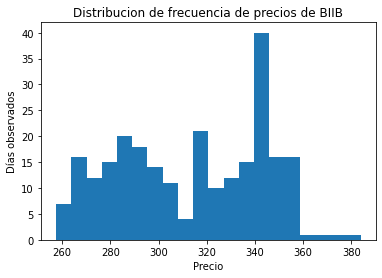

In [9]:
plt.hist(datos['Close', 'BIIB'], bins=20)
plt.xlabel('Precio')
plt.ylabel('Días observados')
plt.title('Distribucion de frecuencia de precios de BIIB')

### Returns Histogram

In finance rarely will we look at the distribution of prices. The reason for this is that prices are non-stationary and move around a lot. For more info on non-stationarity please see [this lecture](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity). Instead we will use daily returns. Let's try that now.

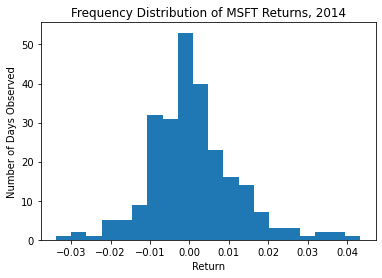

In [10]:
# Remove the first element because percent change from nothing to something is NaN
R = data['High', 'MSFT'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Returns, 2014');

Text(0.5, 1.0, 'Distribucion de frecuencia de precios de BIIB')

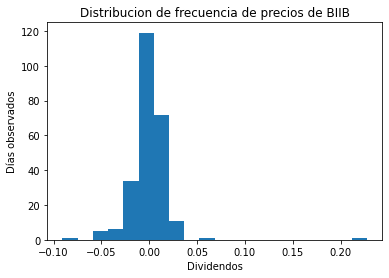

In [11]:
R2=datos['High', 'BIIB'].pct_change()[1:]

plt.hist(R2, bins=20)
plt.xlabel('Dividendos')
plt.ylabel('Días observados')
plt.title('Distribucion de frecuencia de precios de BIIB')

The graph above shows, for example, that the daily returns of MSFT were above 0.03 on fewer than 5 days in 2014. Note that we are completely discarding the dates corresponding to these returns. 

#####IMPORTANT: Note also that this does not imply that future returns will have the same distribution.

### Cumulative Histogram (Discrete Estimated CDF)

An alternative way to display the data would be using a cumulative distribution function, in which the height of a bar represents the number of observations that lie in that bin or in one of the previous ones. This graph is always nondecreasing since you cannot have a negative number of observations. The choice of graph depends on the information you are interested in.

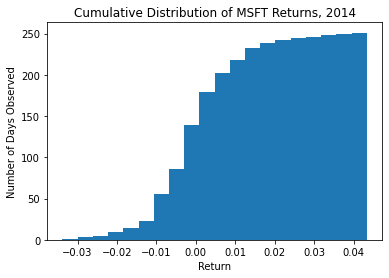

In [12]:
# Remove the first element because percent change from nothing to something is NaN
R = data['High', 'MSFT'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Cumulative Distribution of MSFT Returns, 2014');

Text(0.5, 1.0, 'Distribucion acumulativa de precios de BIIB')

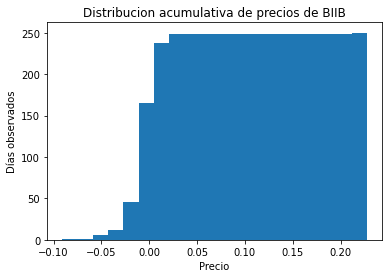

In [13]:
R2=datos['High', 'BIIB'].pct_change()[1:]

plt.hist(R2, bins=20, cumulative=True)
plt.xlabel('Precio')
plt.ylabel('Días observados')
plt.title('Distribucion acumulativa de precios de BIIB')

## Scatter plot

A scatter plot is useful for visualizing the relationship between two data sets. We use two data sets which have some sort of correspondence, such as the date on which the measurement was taken. Each point represents two corresponding values from the two data sets. However, we don't plot the date that the measurements were taken on.

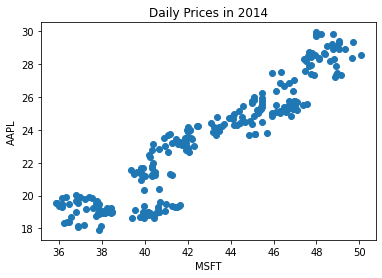

In [14]:
plt.scatter(data['High', 'MSFT'], data['High', 'AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Prices in 2014');

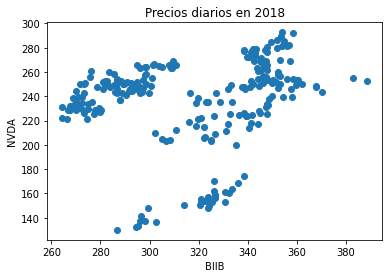

In [15]:
plt.scatter(datos['High', 'BIIB'], datos['High', 'NVDA'])
plt.xlabel('BIIB')
plt.ylabel('NVDA')
plt.title('Precios diarios en 2018');

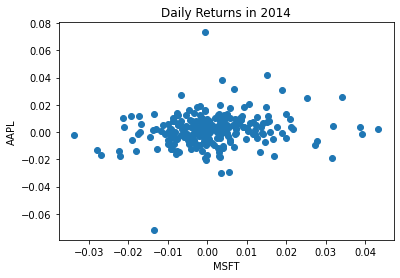

In [16]:
R_msft = data['High', 'MSFT'].pct_change()[1:]
R_aapl = data['High', 'AAPL'].pct_change()[1:]

plt.scatter(R_msft, R_aapl)
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Returns in 2014');

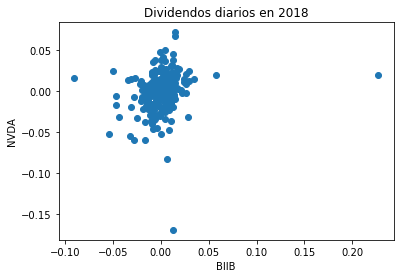

In [17]:
R_biib = datos['High', 'BIIB'].pct_change()[1:]
R_nvda = datos['High', 'NVDA'].pct_change()[1:]

plt.scatter(R_biib, R_nvda)
plt.xlabel('BIIB')
plt.ylabel('NVDA')
plt.title('Dividendos diarios en 2018');

# Line graph

A line graph can be used when we want to track the development of the y value as the x value changes. For instance, when we are plotting the price of a stock, showing it as a line graph instead of just plotting the data points makes it easier to follow the price over time. This necessarily involves "connecting the dots" between the data points, which can mask out changes that happened between the time we took measurements.

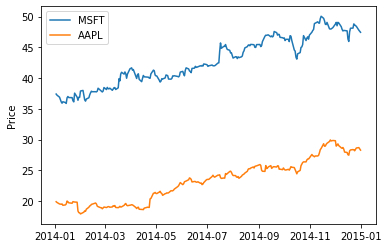

In [18]:
plt.plot(data['High', 'MSFT'])
plt.plot(data['High', 'AAPL'])
plt.ylabel('Price')
plt.legend(['MSFT', 'AAPL']);

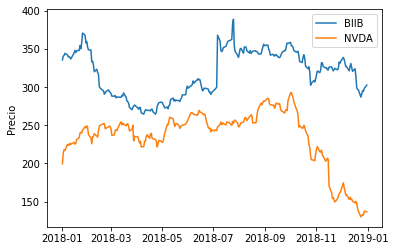

In [19]:
plt.plot(datos['High', 'BIIB'])
plt.plot(datos['High', 'NVDA'])
plt.ylabel('Precio')
plt.legend(['BIIB', 'NVDA']);

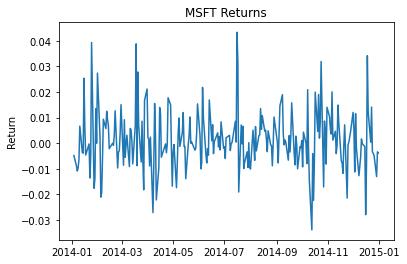

In [20]:
# Remove the first element because percent change from nothing to something is NaN
R = data['High', 'MSFT'].pct_change()[1:]

plt.plot(R)
plt.ylabel('Return')
plt.title('MSFT Returns');

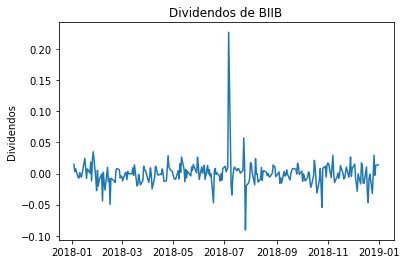

In [21]:
R2 = datos['High', 'BIIB'].pct_change()[1:]

plt.plot(R2)
plt.ylabel('Dividendos')
plt.title('Dividendos de BIIB');

## Never Assume Conditions Hold

Again, whenever using plots to visualize data, do not assume you can test a hypothesis by looking at a graph. Also do not assume that because a distribution or trend used to be true, it is still true. In general much more sophisticated and careful validation is required to test whether models hold. Plots are mainly useful when initially deciding how your models should work.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*